In [1]:
import numpy
import pandas as pd
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import random
import sys
import numpy
import os
import scipy.stats

In [2]:
sys.path.append("../continuous")
sys.path.append("../continuous/measurements")
from measurements import MEASUREMENTS

In [3]:
mpl.style.use("ggplot")

In [4]:
from distributions.alpha import ALPHA
from distributions.arcsine import ARCSINE
from distributions.argus import ARGUS
from distributions.beta import BETA
from distributions.beta_prime import BETA_PRIME
from distributions.beta_prime_4p import BETA_PRIME_4P
from distributions.bradford import BRADFORD
from distributions.burr import BURR
from distributions.burr_4p import BURR_4P
from distributions.cauchy import CAUCHY
from distributions.chi_square import CHI_SQUARE
from distributions.chi_square_3p import CHI_SQUARE_3P
from distributions.dagum import DAGUM
from distributions.dagum_4p import DAGUM_4P
from distributions.erlang import ERLANG
from distributions.erlang_3p import ERLANG_3P
from distributions.error_function import ERROR_FUNCTION
from distributions.exponential import EXPONENTIAL
from distributions.exponential_2p import EXPONENTIAL_2P
from distributions.f import F
from distributions.fatigue_life import FATIGUE_LIFE
from distributions.folded_normal import FOLDED_NORMAL
from distributions.frechet import FRECHET
from distributions.f_4p import F_4P
from distributions.gamma import GAMMA
from distributions.gamma_3p import GAMMA_3P
from distributions.generalized_extreme_value import GENERALIZED_EXTREME_VALUE
from distributions.generalized_gamma import GENERALIZED_GAMMA
from distributions.generalized_gamma_4p import GENERALIZED_GAMMA_4P
from distributions.generalized_logistic import GENERALIZED_LOGISTIC
from distributions.generalized_normal import GENERALIZED_NORMAL
from distributions.generalized_pareto import GENERALIZED_PARETO
from distributions.gibrat import GIBRAT
from distributions.gumbel_left import GUMBEL_LEFT
from distributions.gumbel_right import GUMBEL_RIGHT
from distributions.half_normal import HALF_NORMAL
from distributions.hyperbolic_secant import HYPERBOLIC_SECANT
from distributions.inverse_gamma import INVERSE_GAMMA
from distributions.inverse_gamma_3p import INVERSE_GAMMA_3P
from distributions.inverse_gaussian import INVERSE_GAUSSIAN
from distributions.inverse_gaussian_3p import INVERSE_GAUSSIAN_3P
from distributions.johnson_sb import JOHNSON_SB
from distributions.johnson_su import JOHNSON_SU
from distributions.kumaraswamy import KUMARASWAMY
from distributions.laplace import LAPLACE
from distributions.levy import LEVY
from distributions.loggamma import LOGGAMMA
from distributions.logistic import LOGISTIC
from distributions.loglogistic import LOGLOGISTIC
from distributions.loglogistic_3p import LOGLOGISTIC_3P
from distributions.lognormal import LOGNORMAL
from distributions.maxwell import MAXWELL
from distributions.moyal import MOYAL
from distributions.nakagami import NAKAGAMI
from distributions.nc_chi_square import NC_CHI_SQUARE
from distributions.nc_f import NC_F
from distributions.nc_t_student import NC_T_STUDENT
from distributions.normal import NORMAL
from distributions.pareto_first_kind import PARETO_FIRST_KIND
from distributions.pareto_second_kind import PARETO_SECOND_KIND
from distributions.pert import PERT
from distributions.power_function import POWER_FUNCTION
from distributions.rayleigh import RAYLEIGH
from distributions.reciprocal import RECIPROCAL
from distributions.rice import RICE
from distributions.semicircular import SEMICIRCULAR
from distributions.trapezoidal import TRAPEZOIDAL
from distributions.triangular import TRIANGULAR
from distributions.t_student import T_STUDENT
from distributions.t_student_3p import T_STUDENT_3P
from distributions.uniform import UNIFORM
from distributions.weibull import WEIBULL
from distributions.weibull_3p import WEIBULL_3P


In [5]:
_all_distributions = [
    ALPHA,
    ARCSINE,
    ARGUS,
    BETA,
    BETA_PRIME,
    BETA_PRIME_4P,
    BRADFORD,
    BURR,
    BURR_4P,
    CAUCHY,
    CHI_SQUARE,
    CHI_SQUARE_3P,
    DAGUM,
    DAGUM_4P,
    ERLANG,
    ERLANG_3P,
    ERROR_FUNCTION,
    EXPONENTIAL,
    EXPONENTIAL_2P,
    F,
    FATIGUE_LIFE,
    FOLDED_NORMAL,
    FRECHET,
    F_4P,
    GAMMA,
    GAMMA_3P,
    GENERALIZED_EXTREME_VALUE,
    GENERALIZED_GAMMA,
    GENERALIZED_GAMMA_4P,
    GENERALIZED_LOGISTIC,
    GENERALIZED_NORMAL,
    GENERALIZED_PARETO,
    GIBRAT,
    GUMBEL_LEFT,
    GUMBEL_RIGHT,
    HALF_NORMAL,
    HYPERBOLIC_SECANT,
    INVERSE_GAMMA,
    INVERSE_GAMMA_3P,
    INVERSE_GAUSSIAN,
    INVERSE_GAUSSIAN_3P,
    JOHNSON_SB,
    JOHNSON_SU,
    KUMARASWAMY,
    LAPLACE,
    LEVY,
    LOGGAMMA,
    LOGISTIC,
    LOGLOGISTIC,
    LOGLOGISTIC_3P,
    LOGNORMAL,
    MAXWELL,
    MOYAL,
    NAKAGAMI,
    NC_CHI_SQUARE,
    NC_F,
    NC_T_STUDENT,
    NORMAL,
    PARETO_FIRST_KIND,
    PARETO_SECOND_KIND,
    PERT,
    POWER_FUNCTION,
    RAYLEIGH,
    RECIPROCAL,
    RICE,
    SEMICIRCULAR,
    TRAPEZOIDAL,
    TRIANGULAR,
    T_STUDENT,
    T_STUDENT_3P,
    UNIFORM,
    WEIBULL,
    WEIBULL_3P,
]

In [6]:
def test_chi_square(data, distribution_class):
    ## Init a instance of class
    measurements = MEASUREMENTS(data)
    distribution = distribution_class(measurements)

    ## Parameters and preparations
    N = measurements.length
    num_bins = measurements.num_bins
    frequencies, bin_edges = numpy.histogram(data, num_bins)
    freedom_degrees = num_bins - 1 - distribution.get_num_parameters()

    ## Calculation of errors
    errors = []
    for i, observed in enumerate(frequencies):
        lower = bin_edges[i]
        upper = bin_edges[i + 1]
        expected = N * (distribution.cdf(upper) - distribution.cdf(lower))
        errors.append(((observed - expected) ** 2) / expected)

    ## Calculation of indicators
    statistic_chi2 = sum(errors)
    critical_value = scipy.stats.chi2.ppf(0.95, freedom_degrees)
    p_value = 1 - scipy.stats.chi2.cdf(statistic_chi2, freedom_degrees)
    rejected = statistic_chi2 >= critical_value

    ## Construction of answer
    result_test_chi2 = {"test_statistic": statistic_chi2, "critical_value": critical_value, "p-value": p_value, "rejected": rejected}

    return result_test_chi2

In [7]:
path = "./data/data_normal.txt"
sample_distribution_file = open(path, "r")
data = [float(x.replace(",", ".")) for x in sample_distribution_file.read().splitlines()]

In [8]:
measurements = MEASUREMENTS(data)

In [9]:
## Calculae Histogram
num_bins = measurements.doanes_formula()
frequencies, bin_edges = numpy.histogram(data, num_bins, density=True)
central_values = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]


In [10]:
results = {}

In [11]:
for distribution_class in _all_distributions:
    try:
        chi2_test = test_chi_square(data, distribution_class)
        test_statistic = chi2_test["test_statistic"]
        critical_value = chi2_test["critical_value"]
        p_value = chi2_test["p-value"]
        rejected = chi2_test["rejected"]
        distribution = distribution_class(measurements)
        if rejected == False and numpy.isnan(test_statistic) == False and test_statistic > 0:
            print(distribution_class.__name__)
            print(chi2_test)
            results[distribution] = p_value
    except:
        print("XXX")

BETA
{'test_statistic': 12.177290899990407, 'critical_value': 18.307038053275146, 'p-value': 0.27336633976463565, 'rejected': False}
ERLANG_3P
{'test_statistic': 12.981260469823203, 'critical_value': 19.67513757268249, 'p-value': 0.29455198246501246, 'rejected': False}
F_4P
{'test_statistic': 14.625945607874783, 'critical_value': 18.307038053275146, 'p-value': 0.14630592231590744, 'rejected': False}
GAMMA_3P
{'test_statistic': 12.95890883269068, 'critical_value': 19.67513757268249, 'p-value': 0.29601959737824846, 'rejected': False}
GENERALIZED_NORMAL
{'test_statistic': 10.012976497298768, 'critical_value': 19.67513757268249, 'p-value': 0.5292202825509073, 'rejected': False}
XXX
XXX
XXX
XXX
JOHNSON_SB
{'test_statistic': 12.23996653719892, 'critical_value': 18.307038053275146, 'p-value': 0.26931745659079165, 'rejected': False}
JOHNSON_SU
{'test_statistic': 9.094103452803328, 'critical_value': 18.307038053275146, 'p-value': 0.5231967493864677, 'rejected': False}
XXX
XXX
XXX
NC_T_STUDENT
{

In [12]:
results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1])}
results

{<distributions.f_4p.F_4P at 0x13addbe4f40>: 0.14630592231590744,
 <distributions.johnson_sb.JOHNSON_SB at 0x13addd1bfd0>: 0.26931745659079165,
 <distributions.beta.BETA at 0x13addbe6080>: 0.27336633976463565,
 <distributions.erlang_3p.ERLANG_3P at 0x13addbe4b50>: 0.29455198246501246,
 <distributions.gamma_3p.GAMMA_3P at 0x13addc81690>: 0.29601959737824846,
 <distributions.normal.NORMAL at 0x13addd22c20>: 0.41495830836117786,
 <distributions.nc_t_student.NC_T_STUDENT at 0x13addd23be0>: 0.4597435501692557,
 <distributions.johnson_su.JOHNSON_SU at 0x13addc808e0>: 0.5231967493864677,
 <distributions.generalized_normal.GENERALIZED_NORMAL at 0x13aad0235e0>: 0.5292202825509073,
 <distributions.t_student_3p.T_STUDENT_3P at 0x13addd23f40>: 0.5528258458617732}

OverflowError: math range error

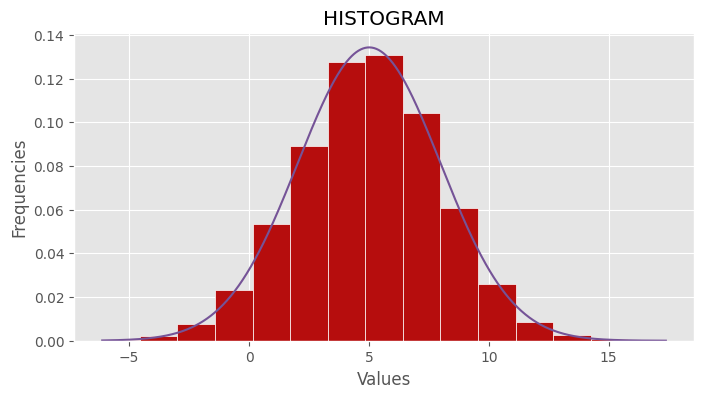

In [13]:
## Histogram of data
plt.figure(figsize=(8, 4))
plt.hist(data, bins=num_bins, density=True, ec="white", color=(168 / 235, 12 / 235, 12 / 235))
plt.title("HISTOGRAM")
plt.xlabel("Values")
plt.ylabel("Frequencies")

ll = min(data)
ul = max(data)
for distribution, sse in list(results.items())[:5]:
    if distribution.__class__.__name__ in [
        "LEVY",
        "CAUCHY",
        "FRECHET",
        "GENERALIZED_PARETO",
    ]:
        ll = min(data) - 10
        ul = max(data) + 10
    x_plot = numpy.linspace(ll, ul, 1000)
    y_plot = [distribution.pdf(x) for x in x_plot]
    label_d = distribution.__class__.__name__ + ": " + str(round(sse, 4))
    color_d = [random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)]
    plt.plot(x_plot, y_plot, label=label_d, color=color_d)

plt.legend(title="NOT REJECTED DISTRIBUTIONS", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()